Missing values per column:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Correlation between Cooking Sessions and Total Orders: 0.91


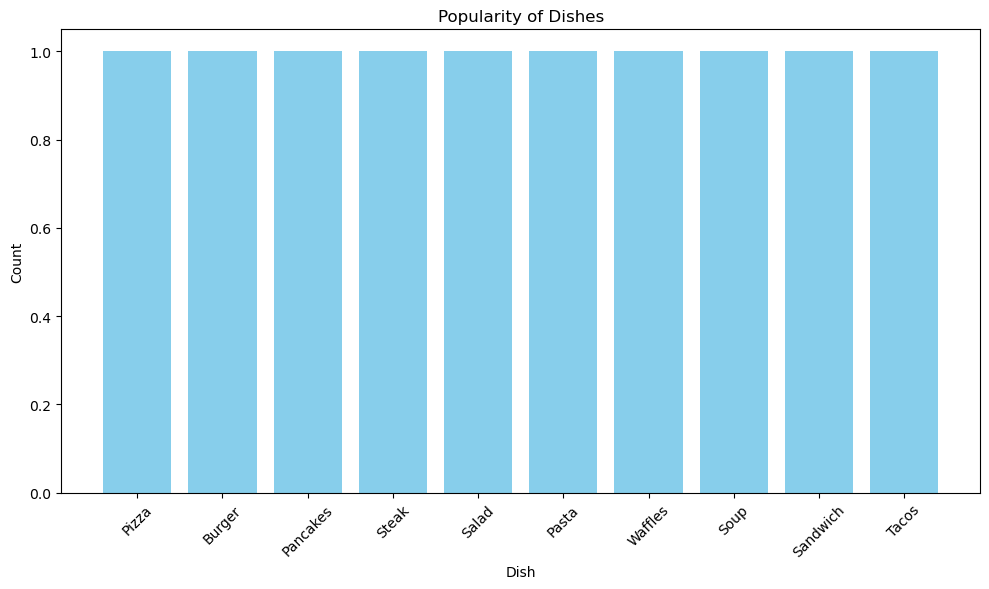

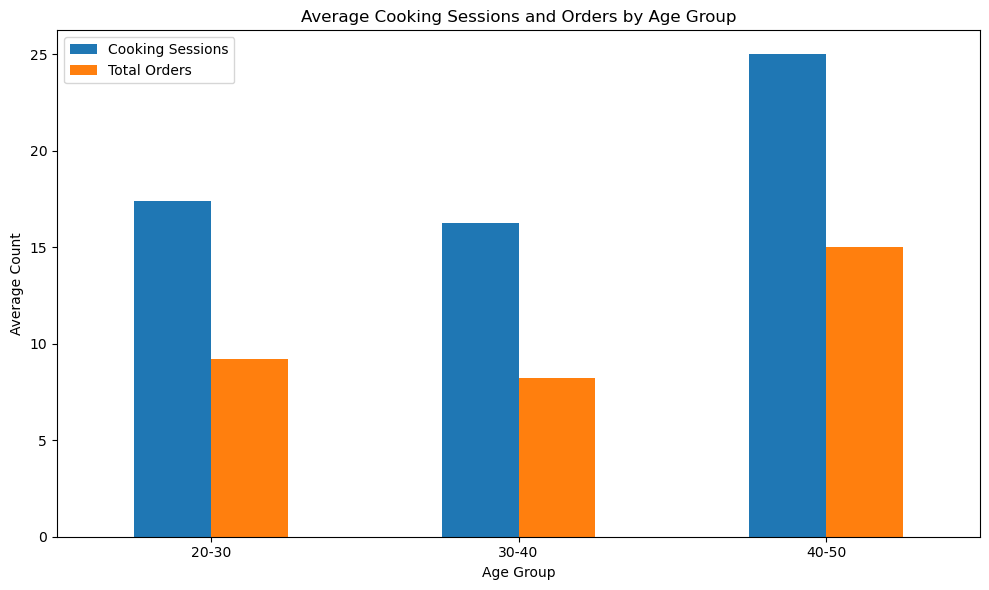

Analysis complete. Results saved to 'cleaned_data.xlsx' and visualizations saved as PNG files.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\sachi\Downloads\Data Analyst Intern Assignment - Excel (1).xlsx"  # dataset file path
data = pd.read_excel(file_path)

# Data Cleaning
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Rename columns for consistency
data.columns = [
    "UserID", "UserName", "Age", "Location", "RegistrationDate", "Phone", "Email", "FavoriteMeal", "TotalOrders"
]

# Convert date columns to datetime format
data["RegistrationDate"] = pd.to_datetime(data["RegistrationDate"])

# Simulate CookingSessions dataset
cooking_sessions = pd.DataFrame({
    "UserID": ["U001", "U002", "U003", "U004", "U005", "U006", "U007", "U008", "U009", "U010"],
    "CookingSessions": [20, 15, 25, 18, 22, 10, 30, 8, 12, 17],
})

# Simulate OrderDetails dataset
order_details = pd.DataFrame({
    "UserID": ["U001", "U002", "U003", "U004", "U005", "U006", "U007", "U008", "U009", "U010"],
    "PopularDish": [
        "Pizza", "Burger", "Pancakes", "Steak", "Salad", "Pasta", "Waffles", "Soup", "Sandwich", "Tacos"
    ],
})

# Merge datasets
merged_data = data.merge(cooking_sessions, on="UserID").merge(order_details, on="UserID")

# Analyze the relationship between cooking sessions and user orders
correlation = merged_data["CookingSessions"].corr(merged_data["TotalOrders"])
print(f"Correlation between Cooking Sessions and Total Orders: {correlation:.2f}")

# Identify popular dishes
popular_dishes = merged_data["PopularDish"].value_counts()

# Explore demographic factors
age_groups = pd.cut(merged_data["Age"], bins=[20, 30, 40, 50], labels=["20-30", "30-40", "40-50"])
age_analysis = merged_data.groupby(age_groups).agg({"CookingSessions": "mean", "TotalOrders": "mean"})

# Visualizations
# Popular Dishes Visualization
plt.figure(figsize=(10, 6))
plt.bar(popular_dishes.index, popular_dishes.values, color="skyblue")
plt.title("Popularity of Dishes")
plt.xlabel("Dish")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("popular_dishes.png")
plt.show()

# Age Group Analysis Visualization
age_analysis.plot(kind="bar", figsize=(10, 6))
plt.title("Average Cooking Sessions and Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.legend(["Cooking Sessions", "Total Orders"])
plt.tight_layout()
plt.savefig("age_group_analysis.png")
plt.show()

# Save the cleaned and merged data to Excel
merged_data.to_excel("cleaned_data.xlsx", index=False)

# Summary Report
with open("README.md", "w") as f:
    f.write("# Data Analytics Assignment\n\n")
    f.write("## Key Insights\n")
    f.write(f"- Correlation between Cooking Sessions and Total Orders: {correlation:.2f}\n")
    f.write("- Popular Dishes:\n")
    for dish, count in popular_dishes.items():
        f.write(f"  - {dish}: {count} occurrences\n")
    f.write("\n## Age Group Analysis\n")
    f.write(age_analysis.to_string())

print("Analysis complete")


Visualizations
Dish Popularity Chart: A bar chart showing the popularity of dishes, saved as popular_dishes.png.
Age Group Analysis Chart: A bar chart showing average cooking sessions and total orders for each age group, saved as age_group_analysis.png.

# Outputs

Cleaned Data: Saves the merged and cleaned dataset to cleaned_data.xlsx.

Summary Report: Generates a README.md file summarizing the key insights:

Correlation between cooking sessions and orders.

Popular dishes and their occurrences.

Analysis of cooking and ordering trends by age group.